# Lab03: Linear Regression and Decision Tree.

- Student ID: 20120128
- Student name: Nguyễn Thị Cẩm Lai

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Rename your notebook with `ID.ipynb` (for example, if your ID is 1234567, rename your notebook with `1234567.ipynb`) and submit it on moodle.

**Contents:**

- Linear Regression.
- Decision Tree.

## Linear Regression

### 1. The hypothesis set

- Linear regression is a **linear** model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x).
- Generally, a linear model will make predictions by calculating a weighted sum of the input features (independent variables). 
$$ \hat{y}=w_0+w_1x_1+w_2x_2+...+w_nx_n $$
    - $\hat{y}$ is the predicted value.
    - $n$ is the number of features.
    - $x_i$ is the $i^{th}$ feature value.
    - $w_j$ is the $j^{th}$ model parameter (including the bias term $w_0$ and the feature weights $w_1,w_2,...w_n)$.
$$\hat{y}=h_{\mathbf{w}}\left(\mathbf{x}\right)=\mathbf{w}^{T}\cdot\mathbf{x}$$
    - $\mathbf{w}$ is the model **parameter vector** (including the bias term $w_0$ and the feature weights $w_1,w_2,...w_n$).
    - $\mathbf{w}^T$ is a transpose  of $\mathbf{w}$ (a row vector insteade of column vector).
    - $\mathbf{x}$ is the instance's **feature vector**, *containing* $x_0$ to $x_n$, with $x_0$ *always equal to* 1.
    - $\mathbf{w}^{T}\cdot\mathbf{x}$ is the dot product of $\mathbf{w}^T$ and $\mathbf{x}$.
    - $h_{\mathbf{w}}$ is the hypothesis function, using the parameters $\mathbf{w}$.
![Bias](Bias.png)

### 2. Performance measure and the learning goal

- Before we start to train the model, we need to determine how good the model fits the training data. There are a couple of ways to determine the level of quality, but we are going to use the most popular one and that is the **MSE** (Mean Square Error). We need to find the value for $\mathbf{w}$ that will minimize the MSE:
$$\mathbf{w}=\arg\min MSE_{\mathcal{D}_{train}}$$


- MSE on the train set $\mathcal{D}_{train}$ denoted as $\left(\mathbf{X},\mathbf{y}\right)$ including m samples $\left\{\left(\mathbf{x}_1,y_1\right),\left(\mathbf{x}_2,y_2\right),...\left(\mathbf{x}_m,y_m\right)\right\}$

$$MSE\left(X,h_{\mathbf{w}}\right)=\dfrac{1}{m}\sum_{i=1}^{m}\left(\mathbf{w}^T\cdot\mathbf{x}_i - y_i\right )^2$$
$$MSE\left(X,h_{\mathbf{w}}\right)=\dfrac{1}{m}\Vert\mathbf{X}\mathbf{w}-\mathbf{y}\Vert^2$$

Example below is a plot of an MSE function where the true target value is 100, and the predicted values range between -10,000 to 10,000. The MSE loss (Y-axis) reaches its minimum value at prediction (X-axis) = 100. The range is 0 to ∞.
![Plot of MSE Loss (Y-axis) vs. Predictions (X-axis)](MSE.png)

- To find the value of $\mathbf{w}$ that minimizes the MSE cost function, the most common way (*we have known since high school*) is to solve the derivative (gradient) equation. 
$$\mathbf{\hat{w}}=\left(\mathbf{X}^T  \mathbf{X}\right)^{\dagger}  \mathbf{X}^T  \mathbf{y}$$
  - $\mathbf{\hat{w}}$ is the value of $\mathbf{w}$ that minimizes the cost function
  - **Notice that** $\mathbf{X}^T  \mathbf{X}$ is not always invertible. $\left(\mathbf{X}^T  \mathbf{X}\right)^{\dagger}$ is pseudo-inverse of $\left(\mathbf{X}^T \mathbf{X}\right)$ - a general case of inverse when the matrix is not invertible or not even square.

### 3. Implementation 

#### Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import sklearn.datasets as datasets
%matplotlib inline

#### Create data

In [2]:
X,y=datasets.make_regression(n_samples=100,n_features=1, noise=5, random_state=42)

#### Load and visualize data

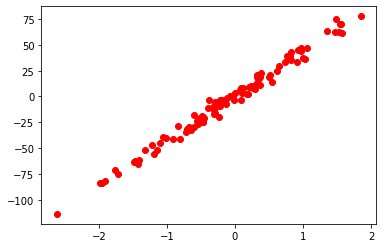

In [3]:
# Visualize data 

plt.plot(X, y, 'ro')
plt.show()


**TODO:** 

- Your observation about data:
    - Theo hàm khởi tạo dữ liệu, thì bộ dữ liệu này có 100 mẫu với độ lệch chuẩn của độ nhiễu gaussian thấp áp dụng cho đầu ra (y) là 5.
    - Biến độc lập x và biến phụ thuộc y của bộ dữ liệu có mối quan hệ tuyến tính cao.
    - Các điểm dữ liệu trên đồ thị có độ phân tán thấp, phân bố theo hình dạng tuyến tính.

#### Training function

In [4]:
def train_linear_regression(X, y):
    '''
    Trains Linear Regression on the dataset (X, y).
    
    Parameters
    ----------
    X : numpy array, shape (m, d + 1)
        The matrix of input vectors (each row corresponds to an input vector); 
        the first column of this matrix is all ones (corresponding to x_0).
    y : numpy array, shape (m, 1)
        The vector of outputs.
    
    Returns
    -------
    w : numpy array, shape (d + 1, 1)
        The vector of parameters of Linear Regression after training.
    '''
    # TODO
    #Thực hiện công thức tính w được cho ở lý thuyết bên trên
    #T: ký hiệu ma trận chuyển vị
    #_inv: ký hiệu ma trận khả nghịch
    XTX=X.T.dot(X)
    XTX_inv=np.linalg.inv(XTX) #Lấy khả nghịch của ma trận XTX
    
    w=XTX_inv.dot(X.T).dot(y)
    return w

In [5]:
# Construct one_added_X 
# TODO:
# First column of one_added_X is all ones (corresponding to x_0).
ones = np.ones(X.shape[0])
one_added_X=np.column_stack([ones, X])
print ('one_added_X.shape =', one_added_X.shape)
print ('y.shape =', y.shape)


one_added_X.shape = (100, 2)
y.shape = (100,)


#### Train our model and visualize result

(-2.8433462685196784, 2.075879348938872)

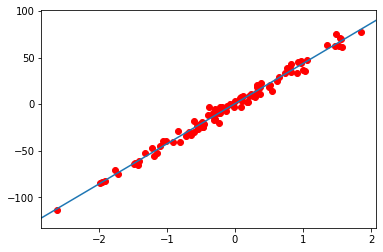

In [6]:
w = train_linear_regression(one_added_X, y)

# Visualize result
predicted_ys = one_added_X.dot(w)

plt.plot(X,y,'ro')

x_min, x_max = plt.xlim()
xs = np.array([x_min, x_max]).reshape(-1, 1)

# Construct one_added_xs 
# TODO:
# First column of one_added_xs is all ones (corresponding to x_0).
ones = np.ones(xs.shape[0])
ones_added_xs=np.column_stack([ones, xs])

predicted_ys = ones_added_xs.dot(w)
plt.plot(xs, predicted_ys)
plt.xlim(x_min, x_max)


- **TODO**: Discuss about advantages and disadvantages of `Linear Regression`:

| Advantages | Disadvantages |
| :- | -: |
| Về mặt lí thuyết các mô hình hồi quy tuyến tính dễ hiểu hơn những loại mô hình khác vì chúng được xây dựng dựa trên các nguyên tắc thống kê cơ bản: hệ số tương quan giữa các biến, lỗi bình phương trung bình,...|Mô hình hoạt động hiệu quả với các bộ dữ liệu chứa các giá trị số (numeric) chứ không phù hợp với các bộ dữ liệu chứa các biến phân loại (categorical)|
| Mô hình đơn giản dễ cài đặt và giải thích. Việc đào tạo mô hình dễ đạt hiệu quả cao nhờ việc tinh chỉnh các siêu tham số | Không hoạt động tốt nếu dữ liệu chứa các điểm ngoại lệ (outliers), dữ liệu phân bố lộn xộn, phi tuyến tính. Khi đó hồi quy tuyến tính cố gắng tìm ra đường thẳng phù hợp nhất với bộ dữ liệu, dễ dẫn đến hiện tượng underfitting |
| Hiệu quả đào tạo cao trên dữ liệu có biến độc lập và biến phụ thuộc có mối quan hệ tuyến tính | Có nhiều cách tránh tình trạng overfitting nhưng trong hồi quy tuyến tính đa biến lại rất dễ rơi vào tình trạng overfitting|
| Có nhiều phương pháp để tránh được tình trạng overfitting: regularization, cross validation,...

## Decision Tree

### 1. Import Library

In [7]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

### 2. Load Iris dataset

In [8]:
from sklearn.model_selection import train_test_split
iris=datasets.load_iris()

X=iris.data
y=iris.target

#split dataset into training data and testing data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=42)

### 3. Decision Tree: Iterative Dichotomiser 3 (ID3)

#### 3.1 Information Gain

Expected value of the self-information (entropy):

$$Entropy=-\sum_{i}^{n}p_ilog_{2}(p_i)$$

The entropy function gets the smallest value if there is a value of $p_i$ equal to 1, reaches the maximum value if all $ p_i $ are equal. These properties of the entropy function make it is an expression of the disorder, or randomness of a system, ...

In [9]:
def entropy(counts, n_samples):
    """
    Parameters:
    -----------
    counts: shape (n_classes): list number of samples in each class (list số lượng mẫu mỗi lớp)
    n_samples: number of data samples (số lượng mẫu của bộ dữ liệu)
    
    -----------
    return entropy 
    """

    #TODO
    entropy=0.0
    for i in counts:
        pi=float(i/n_samples)
        entropy=entropy-pi*np.log2(pi)
    
    return entropy
    
    """
    #TODO
    temp=[-(i/n_samples)*np.log2(i/n_samples) for i in counts]
    temp=np.array(temp)
    return temp.sum()
    """

In [10]:
def entropy_of_one_division(division): 
    """
    Returns entropy of a divided group of data
    Data may have multiple classes
    """
    n_samples = len(division)
    n_classes = set(division)
    
    counts=[]
    #count samples in each class then store it to list counts
    #TODO:
    for i in n_classes:
        count=0
        for j in division:
            if i==j:
                count+=1
        counts.append(count)
    return entropy(counts,n_samples),n_samples

def get_entropy(y_predict, y):
    """
    Returns entropy of a split
    y_predict is the split decision by cutoff, True/Fasle
    """
    n = len(y)
    entropy_true, n_true = entropy_of_one_division(y[y_predict]) # left hand side entropy
    entropy_false, n_false = entropy_of_one_division(y[~y_predict]) # right hand side entropy
    # overall entropy
    #TODO s=?
    s=float(n_true/n)*entropy_true+float(n_false/n)*entropy_false
    return s

The information gain of classifying information set D by attribute A:
$$ Gain(A)=Entrophy(D)-Entrophy_{A}(D)$$

At each node in ID3, an attribute is chosen if its information gain is highest compare to others.

All attributes of the Iris set are represented by continuous values. Therefore we need to represent them with discrete values. The simple way is to use a `cutoff` threshold to separate values of the data on each attribute into two part:` <cutoff` and `> = cutoff`.

To find the best `cutoff` for an attribute, we replace` cutoff` with its values then compute the entropy, best `cutoff` achieved when value of entropy is smallest  $ \left (\arg \min Entrophy_ {A} (D) \right) $.

#### 3.2 Decision tree

In [11]:
class DecisionTreeClassifier:
    def __init__(self, tree=None, depth=0):
        '''Parameters:
        -----------------
        tree: decision tree
        depth: depth of decision tree after training'''
        
        self.depth = depth
        self.tree=tree
    def fit(self, X, y, node={}, depth=0):
        '''Parameter:
        -----------------
        X: training data
        y: label of training data
        ------------------
        return: node 
        
        node: each node represented by cutoff value and column index, value and children.
         - cutoff value is thresold where you divide your attribute
         - column index is your data attribute index
         - value of node is mean value of label indexes, 
           if a node is leaf all data samples will have same label
        
        Note that: we divide each attribute into 2 part => each node will have 2 children: left, right.
        '''
        
        #Stop conditions
        
        #if all value of y are the same 
        if np.all(y==y[0]):
            return {'val':y[0]}

        else: 
            col_idx, cutoff, entropy = self.find_best_split_of_all(X, y)    # find one split given an information gain 
            y_left = y[X[:, col_idx] < cutoff]
            y_right = y[X[:, col_idx] >= cutoff]
            node = {'index_col':col_idx,
                        'cutoff':cutoff,
                   'val':np.mean(y)}
            node['left'] = self.fit(X[X[:, col_idx] < cutoff], y_left, {}, depth+1)
            node['right'] = self.fit(X[X[:, col_idx] >= cutoff], y_right, {}, depth+1)
            self.depth += 1 
            self.tree = node
            return node
    
    def find_best_split_of_all(self, X, y):
        col_idx = None
        min_entropy = 1
        cutoff = None
        for i, col_data in enumerate(X.T):
            entropy, cur_cutoff = self.find_best_split(col_data, y)
            if entropy == 0:                   #best entropy
                return i, cur_cutoff, entropy
            elif entropy <= min_entropy: #cập nhật min_entropy nếu nó là giá trị tôt
                min_entropy = entropy
                col_idx = i
                cutoff = cur_cutoff
               
        return col_idx, cutoff, min_entropy
    
    def find_best_split(self, col_data, y):
        ''' Parameters:
        -------------
        col_data: data samples in column'''
         
        min_entropy = 10

        #Loop through col_data find cutoff where entropy is minimum
        
        for value in set(col_data):
            y_predict = col_data < value
            my_entropy = get_entropy(y_predict, y)
            #TODO
            #min entropy=?, cutoff=?
            if my_entropy<=min_entropy:
                min_entropy=my_entropy
                cutoff=value
            
        return min_entropy, cutoff
                                               
    def predict(self, X):
        tree = self.tree
        pred = np.zeros(shape=len(X))
        for i, c in enumerate(X):
            pred[i] = self._predict(c)
        return pred
    
    def _predict(self, row):
        cur_layer = self.tree
        while cur_layer.get('cutoff'):
            if row[cur_layer['index_col']] < cur_layer['cutoff']:
                cur_layer = cur_layer['left']
            else:
                cur_layer = cur_layer['right']
        else:
            return cur_layer.get('val')

#### 3.3 Classification on Iris Dataset

In [12]:
model = DecisionTreeClassifier()
tree = model.fit(X_train, y_train)
pred=model.predict(X_train)
print('Accuracy of your decision tree model on training data:', accuracy_score(y_train,pred))
pred=model.predict(X_test)
print('Accuracy of your decision tree model:', accuracy_score(y_test,pred))


Accuracy of your decision tree model on training data: 1.0
Accuracy of your decision tree model: 0.96


**TODO**: F1, Recall and Precision report

### Giới thiệu
Khi đã xây dựng một mô hình machine learning và huấn luyện nó trên một tập dữ liệu, điều tiếp theo chúng ta cần làm là đánh giá hiệu năng của mô hình trên tập dữ liệu mới.

Khi thực hiện bài toán phân loại (classification), có 4 trường hợp của dự đoán có thể xảy ra:

- **True Positive**: đối tượng ở lớp Positive, mô hình phân đối tượng vào lớp Positive (dự đoán đúng)
- **True Negative**: đối tượng ở lớp Negative, mô hình phân đối tượng vào lớp Negative (dự đoán đúng)
- **False Positive**: đối tượng ở lớp Negative, mô hình phân đối tượng vào lớp Positive (dự đoán sai)
- **False Negative**: đối tượng ở lớp Positive, mô hình phân đối tượng vào lớp Negative (dự đoán sai)

**Precision (độ chuẩn xác)**, **Recall (độ phủ)**, **F1** là các metric dùng để đánh giá hiệu quả của một mô hình học máy khi giải quyết các bài toán phân loại (classification), đặc biệt là các bài toán phân loại với các lớp có số lượng mẫu chênh lệch nhau nhiều. Mỗi metric sẽ có ý nghĩa và cách tính khác nhau.


### Bài toán đặt ra

Ở đây ta sẽ đưa ra một bài toán phân loại nhị phân để minh họa cho vai trò của các metric trên. Một bài toán đặt ra là: **Căn cứ vào các triệu chứng biểu hiện của một người, mô hình máy học phải xác định xem người đó có mắc covid 19 hay không?**

**Quy ước nhãn:**
- 1 (positive): dương tính với covid 19
- 0 (negative): âm tính với covid 19

**Quy ước các ký hiệu**:
- TP (True Positive): Trường hợp dự đoán đúng mẫu dương tính.
- FP (False Positive): Trường hợp dự đoán sai mẫu dương tính.
- TN (True Negative): Trường hợp dự đoán đúng mẫu âm tính.
- FN (False Negative): Trường hợp dự đoán sai mẫu âm tính.

**Giả sử:**

Ta có tổng số mẫu khảo sát là 1000 mẫu (tương ứng với 1000 người) trong đó chính xác có 900 mẫu âm tính và 100 mẫu là dương tính. Sau khi đưa qua mô hình phân loại kết quả mô hình cho ra như sau:

![img](https://raw.githubusercontent.com/ntclai/EDA-World-Population/main/Untitled3.png)


**Đánh giá:**

$$Accuracy = \frac{TP+TN}{TP + FP + TN + FN} = \frac{40 + 880}{60 + 40 + 20 + 880} = 0.92 $$

Mô hình này có thể dự đoán đúng đến 92% (có nghĩa là trong số 100 mẫu thì có 92 mẫu được phân loại chính xác). Đây có lẽ là độ chính xác cao, nhưng liệu nó có thật sự tốt hay không?

Một vấn đề nghiêm trọng ta nhận thấy là số ca dương tính mà mô hình phát hiện chỉ chiếm 40% tổng số ca nhiễm mà trong bài toán này việc xác định đúng mẫu dương tính là vấn đề cực kỳ quan trọng vì nó liên quan đến sức khỏe cả cộng đồng. Do đó Accuracy tuy cao nhưng là vô nghĩa khi dùng để đánh giá cho mô hình có bộ dữ liệu bị hiện tượng mất cân bằng (các lớp có số lượng mẫu chênh lệch nhau nhiều) và mức quan trọng của các lớp là khác nhau.

### Hướng giải quyết
Các metric:  F1, Precision và Recall được sử dụng để khắc phục vấn đề trên. Bảng sau sẽ trình bày tóm tắt về các metric này:

![img](https://raw.githubusercontent.com/ntclai/EDA-World-Population/main/Untitled4.png)

### Nhận xét
**Precision (Độ chuẩn xác)**: độ chuẩn xác càng cao thì mô hình sẽ dự đoán càng tốt cho các mẫu thuộc lớp positive.

- Ví dụ: với Precision = 0,9 có nghĩa là mô hình dự đoán đúng 90 mẫu trong 100 mẫu mô hình dự đoán là positive.

**Recall (Độ phủ)**: cho biết mức độ bỏ sót các mẫu thuộc lớp positive của mô hình. Recall càng cao chứng tỏ mô hình bỏ sót rất ít các mẫu thuộc lớp positive. Recall cũng có ý nghĩa gần tương tự như Precision, có cùng tử số nhưng có một chút khác biệt về mẫu số trong công thức tính toán.

- Ví dụ: với Recall = 0,9 có nghĩa là mô hình dự đoán đúng 90 mẫu trong 100 mẫu thực sự là positive.

**Trade off giữa Precision và Recall**: 
- Trong thực tế một mô hình phân loại nhị phân lý tưởng là khi có Precision và Recall cao (càng gần 1 càng tốt), tuy nhiên điều này là rất khó xảy ra. Thường sảy ra trường hợp Precision cao, Recall thấp hoặc Precision thấp, Recall cao. Khi đó rất khó để lựa chọn đâu là một mô hình tốt vì không biết rằng nên đánh giá theo Precision hay Recall. 
- Sự đánh đổi này thường xuyên diễn ra trong các bộ dữ liệu thực tế do đó cần tìm cách kết hợp cả Precision và Recall tạo ra một độ đo mới và đó chính là F1.

**F1**: Xét thấy giá trị F1 được tính bằng cách sử dụng trung bình điều hòa, giá trị F1 luôn nằm trong khoảng của Precision và Recall. Do đó F1 sẽ phạt nặng hơn những trường hợp mô hình có Precision thấp, Recall cao hoặc Precision cao, Recall thấp. Đây là những trường hợp tương đương với dự báo thiên về một nhóm là positive hoặc negative nên không phải là mô hình tốt. Điểm số từ trung bình điều hòa sẽ giúp ta nhận biết được những trường hợp không tốt như vậy.
